<a href="https://colab.research.google.com/github/rubel-ds-ai/sm-tasks/blob/main/Assignment_6_Introduction_to_Machine_Learning_Skill_Morph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Question 1: Find the Best Tree Depth
# Task: Test depths 3, 4, 5 and find highest accuracy
# Optional: Feature: 10; test depths 5,6,7,8,9

# Question 2: Calculate All Metrics
# Task: Use best depth to calculate precision, recall, F1-score

# Question 3: Test on New Patients
# Question 4: Analyze Confusion Matrix

In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,
    precision_score, recall_score, f1_score,
    roc_curve, roc_auc_score, auc
)
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data_url = 'https://github.com/rubel-ds-ai/public-datasets/raw/refs/heads/main/sm-datasets/Breast_Cancer_Wisconsin_Dataset.csv'
data = pd.read_csv(data_url)

In [4]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [9]:
# Convert diagnosis to numbers
data['diagnosis_numeric'] = data['diagnosis'].replace({'M': 1, 'B': 0})
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32,diagnosis_numeric
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN,1
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN,1
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN,1
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN,1
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN,1


In [12]:
# Selecting only the most important features (make it simple!)
important_features = [
    'radius_mean',      # Size of tumor
    'texture_mean',     # Surface texture
    'area_mean',        # Area of tumor
    'smoothness_mean',  # How smooth the surface is
    'compactness_mean', # How compact the tumor is
]

# Creating simple dataset
X = data[important_features]  # Patient measurements
y = data['diagnosis_numeric']  # Malignant (1) or Benign (0)
print(f"X (measurements): {X.shape}")
print(f"y (diagnosis): {y.shape}")

X (measurements): (569, 5)
y (diagnosis): (569,)


In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=20
)


# Question 1: Find the Best Tree Depth
# Task: Test depths 3, 4, 5 and find highest accuracy


In [16]:
depths = [3, 4, 5]
accuracies = {}

for d in depths:
  model = DecisionTreeClassifier(max_depth=d, random_state=42)
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)

  acc = accuracy_score(y_test, y_pred)
  accuracies[d] = acc
  print(f"Depth: {d}, Accuracy: {acc}")

# Finding the best depth
best_depth = max(accuracies, key=accuracies.get)
print(f"\n Best tree depth: {best_depth} (Accuracy = {accuracies[best_depth]:.4f})")

Depth: 3, Accuracy: 0.8859649122807017
Depth: 4, Accuracy: 0.9035087719298246
Depth: 5, Accuracy: 0.8947368421052632

 Best tree depth: 4 (Accuracy = 0.9035)


## Optional: Feature: 10; test depths 5,6,7,8,9

In [35]:
# Ignoring 'diagnosis' and only use first 10 feature columns
feature_columns = data.columns.drop(['diagnosis', 'diagnosis_numeric'])
selected_features = feature_columns[1:11]  # pick first 10 numeric features except id

X = data[selected_features]
y = data['diagnosis_numeric']

# Splitting data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Test depths 5–9
depths = [5, 6, 7, 8, 9]
accuracies = {}

for d in depths:
    model = DecisionTreeClassifier(max_depth=d, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies[d] = acc
    print(f"Depth = {d} → Accuracy = {acc:.4f}")

# Finding the best depth
best_depth = max(accuracies, key=accuracies.get)
print(f"\n Best tree depth: {best_depth} (Accuracy = {accuracies[best_depth]:.4f})")

Depth = 5 → Accuracy = 0.9386
Depth = 6 → Accuracy = 0.9386
Depth = 7 → Accuracy = 0.9123
Depth = 8 → Accuracy = 0.9386
Depth = 9 → Accuracy = 0.9298

 Best tree depth: 5 (Accuracy = 0.9386)


# Question 2: Calculate All Metrics
# Task: Use best depth to calculate precision, recall, F1-score

In [36]:
# Using the best tree depth from Question 1
best_model = DecisionTreeClassifier(max_depth=best_depth, random_state=42)
best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)

# Calculating all metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Model Performance Metrics (Depth =", best_depth, ")")
print(f"Accuracy  : {accuracy:.4f}")
print(f"Precision : {precision:.4f}")
print(f"Recall    : {recall:.4f}")
print(f"F1-score  : {f1:.4f}")


Model Performance Metrics (Depth = 5 )
Accuracy  : 0.9386
Precision : 0.9091
Recall    : 0.9302
F1-score  : 0.9195


# Question 3: Test on New Patients

In [37]:
# Example: 2 new patients (using the same 10 selected features)
new_patients = pd.DataFrame([
    [10.2, 14.0, 65.0, 350.0, 0.08, 0.09, 0.04, 0.03, 0.12, 0.04],  # likely benign
    [15.2, 17.6, 100.2, 700.3, 0.12, 0.18, 0.06, 0.05, 0.20, 0.07], # maybe malignant
    [20.1, 28.4, 130.7, 1200.5, 0.10, 0.14, 0.05, 0.04, 0.18, 0.06]  # clearly malignant
], columns=selected_features)

# Predicting diagnosis for new patients
predictions = best_model.predict(new_patients)

# Showing results
for i, pred in enumerate(predictions):
    result = "Malignant (1)" if pred == 1 else "Benign (0)"
    print(f"Patient {i+1}: {result}")

Patient 1: Benign (0)
Patient 2: Malignant (1)
Patient 3: Malignant (1)


# Question 4: Analyze Confusion Matrix

[[67  4]
 [ 3 40]]


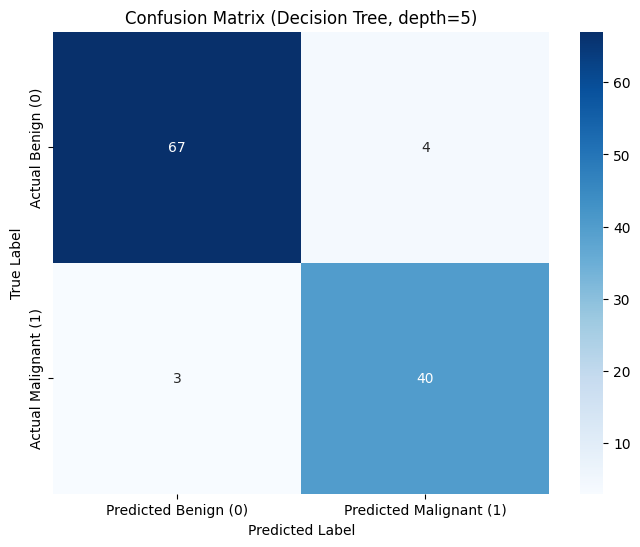

In [54]:
# Predicting on test data again (for consistency)
y_pred = best_model.predict(X_test)

# Creating confusion matrix
cm = confusion_matrix(y_test, y_pred)

# print("Confusion Matrix (raw numbers):")
print(cm)

# Visualizing the confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Benign (0)', 'Predicted Malignant (1)'],
            yticklabels=['Actual Benign (0)', 'Actual Malignant (1)'])
plt.title(f"Confusion Matrix (Decision Tree, depth={best_depth})")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# **Analysis**
1.   67 benign cases were correctly predicted as benign (True Negatives).
2.   4 benign cases were incorrectly predicted as malignant (False Positives).
3.   3 malignant cases were incorrectly predicted as benign (False Negatives).
4.   40 malignant cases were correctly predicted as malignant (True Positives).



